In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

In [19]:
#This function is to return the values of the 2 derivatives for the reaction A => B with first order kinetics
def  ODEfun(t,Yfuncvec):#fun(t,y) and return dy/dt
    Mw1 = Yfuncvec[0] 
    Ms1 = Yfuncvec[1]
    Mw2 = Yfuncvec[2] 
    Ms2 = Yfuncvec[3] 
    
    rho=1000
    M1=Mw1+Ms1
    M2=Mw2+Ms2
    V2=M2/rho
    V1=M1/rho
    Xw2=Mw2/M2
    Xs2=Ms2/M2
    Xw1=Mw1/M1    
    Xs1=Ms1/M1
    
    dMw1dt=rho*0.3*V2*Xw2-rho*0.2*Xw1*V1
    dMs1dt=rho*0.3*V2*Xs2-rho*0.2*Xs1*V1
    dMw2dt=-rho*0.3*V2*Xw2
    dMs2dt=2-0.3*V2*Xs2*rho
    
    
    
    dYfuncvecdt = [dMw1dt, dMs1dt, dMw2dt, dMs2dt ] 
    return dYfuncvecdt 

In [25]:
#test of function ODEfun.  This will return values of dFA/dV=rA and dFB/dV=-rA at a value of V
M0 = [100,0,1000,0] # Initial values for the dependent variables V
sol=ODEfun(0,V0)#Evaluates the derivatives at t=0s
print (sol)

[280.0, 0.0, -300.0, 2.0]


In [26]:
#test of solve_ivp function (python ODE Initial Value Problem solver from scipy library)
tspan = (0,40) # Range for the independent variable t 
#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of V
sol=solve_ivp(ODEfun,tspan,M0) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 110
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 7.07102191e-04, 7.77812410e-03, 7.84883432e-02,
       7.15739169e-01, 2.08697891e+00, 4.11950461e+00, 6.67521082e+00,
       9.62861694e+00, 1.28271854e+01, 1.61215066e+01, 1.94466939e+01,
       2.27810489e+01, 2.61177030e+01, 2.94546837e+01, 3.27920202e+01,
       3.61313858e+01, 3.94775812e+01, 4.00000000e+01])
 t_events: None
        y: array([[1.00000000e+02, 1.00197952e+02, 1.02173463e+02, 1.21531524e+02,
        2.66242709e+02, 4.38123583e+02, 4.88229733e+02, 4.10710861e+02,
        2.84820291e+02, 1.74305502e+02, 9.94768660e+01, 5.46227176e+01,
        2.93195753e+01, 1.55152732e+01, 8.13388515e+00, 4.23679964e+00,
        2.19623909e+00, 1.13339936e+00, 1.02195412e+00],
       [0.00000000e+00, 1.49980377e-07, 1.81262532e-05, 1.82412925e-03,
        1.36539797e-01, 9.30746969e-0

This shows an unrealistic answer since we can not go below zero in the tank.
To find this time we can request the solve_ivp to give us more points and
 - make a plot
 - print out a table of values
 - or we can add in a second differential equation to give the time that V <0.

In [27]:
#makes a smoother line by using more values
tspan = (0,75) # Range for the independent variable t 
teval=np.linspace(tspan[0],tspan[1],101)
sol=solve_ivp(ODEfun,tspan,M0,t_eval=teval)
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 158
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.  ,  0.75,  1.5 ,  2.25,  3.  ,  3.75,  4.5 ,  5.25,  6.  ,
        6.75,  7.5 ,  8.25,  9.  ,  9.75, 10.5 , 11.25, 12.  , 12.75,
       13.5 , 14.25, 15.  , 15.75, 16.5 , 17.25, 18.  , 18.75, 19.5 ,
       20.25, 21.  , 21.75, 22.5 , 23.25, 24.  , 24.75, 25.5 , 26.25,
       27.  , 27.75, 28.5 , 29.25, 30.  , 30.75, 31.5 , 32.25, 33.  ,
       33.75, 34.5 , 35.25, 36.  , 36.75, 37.5 , 38.25, 39.  , 39.75,
       40.5 , 41.25, 42.  , 42.75, 43.5 , 44.25, 45.  , 45.75, 46.5 ,
       47.25, 48.  , 48.75, 49.5 , 50.25, 51.  , 51.75, 52.5 , 53.25,
       54.  , 54.75, 55.5 , 56.25, 57.  , 57.75, 58.5 , 59.25, 60.  ,
       60.75, 61.5 , 62.25, 63.  , 63.75, 64.5 , 65.25, 66.  , 66.75,
       67.5 , 68.25, 69.  , 69.75, 70.5 , 71.25, 72.  , 72.75, 73.5 ,
       74.25, 75.  ])
 t_events: None
        y: ar

Text(0, 0.5, 'Mass of Pollutant S ($kg$)')

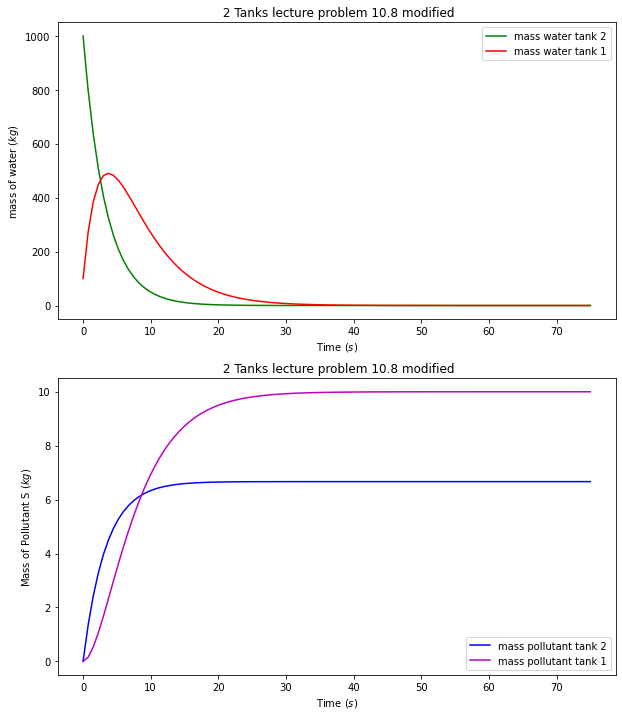

In [6]:
#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'g',label='mass water tank 2')

plt.plot(sol.t,sol.y[2],'r',label='mass water tank 1')


#plt.plot([0,80],[0, 0],linestyle=':')#This plots the horizontal line at V=0


plt.legend()
plt.title(' 2 Tanks lecture problem 10.8 modified')
plt.xlabel('Time ($s$)')
plt.ylabel('mass of water ($kg$)')

plt.subplot (2,1,2)
plt.plot(sol.t,sol.y[1],'b',label='mass pollutant tank 2')
plt.plot(sol.t,sol.y[3],'m',label='mass pollutant tank 1')

#plt.plot([0,80],[0, 0],linestyle=':')#This plots the horizontal line at V=0


plt.legend()
plt.title(' 2 Tanks lecture problem 10.8 modified')
plt.xlabel('Time ($s$)')
plt.ylabel('Mass of Pollutant S ($kg$)')

Text(0, 0.5, 'mass fraction')

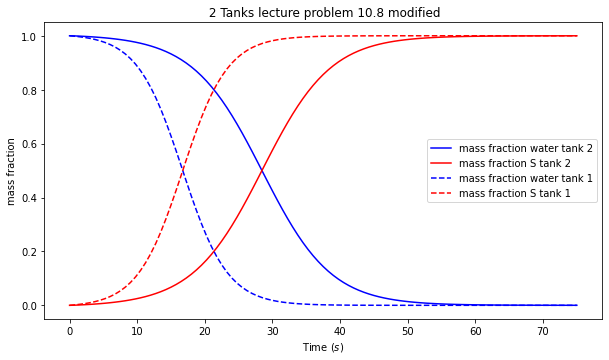

In [28]:
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0]/(sol.y[0]+sol.y[1]),'b',label='mass fraction water tank 2')

plt.plot(sol.t,sol.y[1]/(sol.y[0]+sol.y[1]),'r',label='mass fraction S tank 2')
plt.plot(sol.t,sol.y[2]/(sol.y[2]+sol.y[3]),'b',linestyle='--', label='mass fraction water tank 1')

plt.plot(sol.t,sol.y[3]/(sol.y[2]+sol.y[3]),'r',linestyle='--',label='mass fraction S tank 1')

#plt.plot([0,80],[0, 0],linestyle=':')#This plots the horizontal line at V=0


plt.legend()
plt.title(' 2 Tanks lecture problem 10.8 modified')
plt.xlabel('Time ($s$)')
plt.ylabel('mass fraction')

#plt.subplot (2,1,2)
